In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Percentiles

0-10 mins

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [28]:
Table().with_columns(
    'Percent', make_array(1, 10, 20, 39, 40, 41, 50),
    'Percentile', make_array(
        percentile(1, v), percentile(10, v),
        percentile(20, v), percentile(39, v),
        percentile(40, v), percentile(41, v),
        percentile(50, v)
    )
)

Percent,Percentile
1,1
10,1
20,1
39,3
40,3
41,5
50,5


```
   1  3  5  7   9
0 20 40 60 80 100
```

## Estimation

10-20 mins

In [4]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [29]:
sf.sort(2).show(3)

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"


In [30]:
sf.sort(2, descending=True).show(3)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"


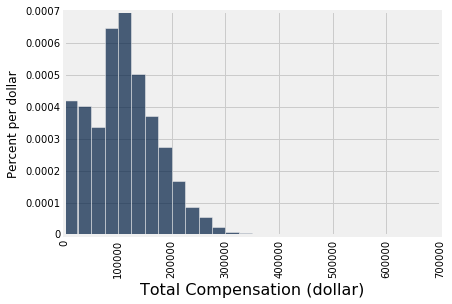

In [7]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

In [8]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Transit Operator,"111,569"
Public Protection,Police Officer 3,"215,157"
"Public Works, Transportation & Commerce",Transit Operator,"116,057"


In [9]:
np.median(sample_from_population.column(2))

110880.07500000001

## Aside: lists and append

In [10]:
s = [2, 3]
s.append(4)
s

[2, 3, 4]

In [11]:
a = make_array(2, 3)
# a.append(4)
np.append(a, 4)
a

array([2, 3])

## Sample variability

20-35 mins

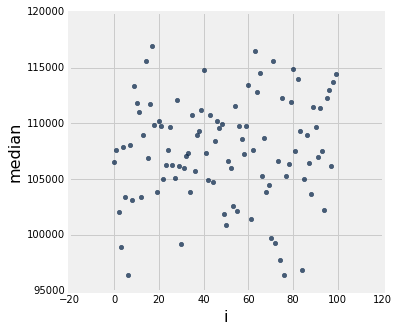

In [12]:
medians = []
repetitions = np.arange(100)
for i in repetitions:
    sample_from_population = sf.sample(200, with_replacement=False)
    medians.append(np.median(sample_from_population.column(2)))

Table().with_columns('i', repetitions, 'median', medians).scatter(0)

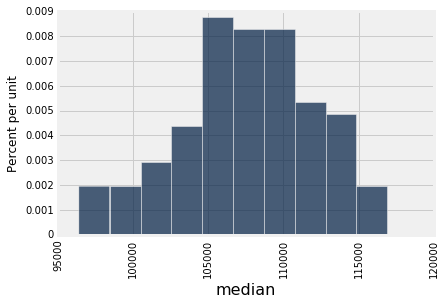

In [13]:
Table().with_columns('median', medians).hist(0)

In [14]:
percentile(2.5, medians)

96906.059999999998

In [15]:
percentile(97.5, medians)

115588.99000000001

In [16]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 96906.06 and 115588.99


## Bootstrap

35-50 mins

In [33]:
sample_from_population.show(3) # From now on, this is all we have.

Organization Group,Job,Total Compensation
General Administration & Finance,Sr Community Dev Spec 2,"140,178"
Community Health,Registered Nurse,"185,727"
Public Protection,Police Officer,"192,371"


In [18]:
np.median(sample_from_population.column(2))

114400.535

In [34]:
resample = sample_from_population.sample().show(3)
resample

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Painter,"115,055"
"Public Works, Transportation & Commerce",Senior Clerk,"64,871"
Public Protection,Deputy Sheriff,"158,730"


In [20]:
np.median(resample.column(2))

105690.64000000001

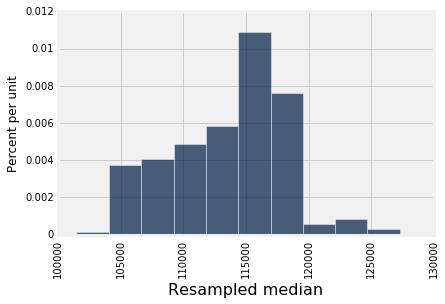

In [21]:
resampled_medians = []
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)
    
Table().with_column('Resampled median', resampled_medians).hist(0)

## Confidence Intervals

In [31]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 103028.08 and 121708.29


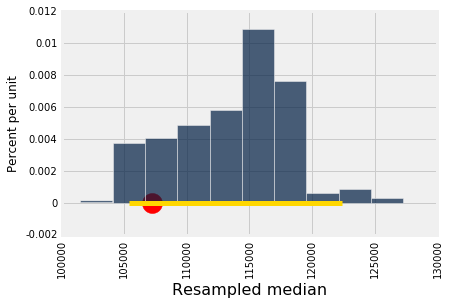

In [23]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400)

In [24]:
sample_from_population = sf.sample(200)
print('Sample median:', np.median(sample_from_population.column(2)))

Sample median: 104575.23
